In [1]:
%matplotlib nbagg

In [2]:
import jefimenko
import numpy as np
import pdb

Jefimenko version 0.0.1


In [3]:
C_0 = 299792458
K_e = 8.9875517873681764 * 10**9
E_0 = (4 * np.pi * K_e) ** -1
U_0 = (C_0 ** 2 * E_0) ** -1

In [4]:
def print_specs(mapping):
    
    for t in range(int(mapping.time/mapping.delta_t)):
        # jefimenko.plot_grid(mapping, time = t)
        jefimenko.plot_EM_grid('H', mapping, time=t)

    print('conductors')
    for i in range(len(mapping.conductors)):
            print(mapping.conductors[i].location)

    jefimenko.plot_grid(mapping)
    # for t in range(10):

    for t in range(len(mapping.currents)):
        if len(mapping.currents[t]) != 0:
            print('at time = ' + str(t))
            print('currents')
            for i in range(len(mapping.currents[t])):
                print(mapping.currents[t][i].amps)
                print(mapping.currents[t][i].direction)
                #if len(mapping.conductors) != 0:
                #    print(mapping.currents[t][mapping.conductors[0].current].amps)
                #    print(mapping.currents[t][mapping.conductors[0].current].direction)
            print('')
    
    for t in range(len(mapping.charges)):
        if len(mapping.charges[t]) != 0:
            print('charges at time = ' + str(t))
            print('charges')
            #for i in range(len(mapping.charges[t])):
            for i in range(len(mapping.charges[t])):
                print("the charge number is " + str(i))
                print(mapping.charges[t][i].Q)
            print('')
    
    for t in range(len(mapping.grid['E'])):
        print('at time = ' + str(t))
        print('the E field is:')
        #field = jefimenko.print_location(mapping.grid['H'][T], [1], mapping)
        #print(field)
        print(mapping.grid['E'][t])
        print('')
        
    for t in range(len(mapping.grid['H'])):
        print('at time = ' + str(t))
        print('the H field is:')
        #field = jefimenko.print_location(mapping.grid['H'][T], [1], mapping)
        #print(field)
        print(mapping.grid['H'][t])
        print('this makes the B field')
        print(U_0 * mapping.grid['H'][t])
        print('')
    print()
    
    #print(mapping.charges[0].location)
   # for t in range(len(mapping.grid['E'])):
   #     print("this should be the free charge")
   #     print(mapping.charges[t][0].Q)
    

    #for i in range(len(mapping.conductors)):
        #print("this is for conductor " + str(i))
        #print(mapping.conductors[i].charges)

In [5]:
def test_charge_1():
    mapping = jefimenko.Grid(delta=[1, 1, 1],  # this is the size of a step in x, y and z in meters
                size=[10, 1, 1],  # this is the size of the grid in meters
                time=10 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
 
    count = mapping.Add_Charge([0], Q = 1, charge_count=True)
    print("charge_count is " + str(count))
    jefimenko.plot_grid(mapping)

    jefimenko.simulate(mapping)

    #if(mapping.grid['E'][0][1] == [0, 0, 0]).all():
    if(mapping.grid['E'][0][1][0][0] == [0, 0, 0]).all():
        print("time == 0 R == 1 E field PASS")
    else:
        print("time = 0 R == 1 E field FAIL")

    if(mapping.grid['H'][0][1][0][0] == [0, 0, 0]).all():
        print("time == 0 R == 1 H field PASS")
    else:
        print("time == 0 R == 1 H field FAIL")

    test_array = [8987551787.368176, 0, 0]

    if (mapping.grid['E'][1][1][0][0] - test_array < .01).all():
        percent = (np.linalg.norm(mapping.grid['E'][1][1][0][0] - 8987551787.368176) / 8987551787.368176)
        print("time == 1 R == 1 E filed PASS")
        # print("E field is within " + str(percent) + " percent at time = 1")
        # print("E field is " + str(mapping.grid['E'][1][1]))
    else:
        print("time == 0 R == 1 E field FAIL")   

    test_array = [2246887946.842, 0, 0]
    if (mapping.grid['E'][1][2][0][0] - test_array < .01).all():
        print("time == 1 R == 2 E field Pass")
    else:
        print("time == 1 R == 2 E field Fail")
        print(mapping.grid['E'][1][2][0][0])
        
    if(mapping.grid['H'][1][1][0][0] == [0, 0, 0]).all():
        print("time == 1 R == 1 H field PASS")
    else:
        print("time == 1 R == 1 H field FAIL")
    #for t in range(mapping.time_size):
    #    jefimenko.plot_EM_grid('E', mapping, time=t)

    #field = jefimenko.print_location(mapping.grid['E'][1], [1, 0], mapping)
    #print(field)
    #jefimenko.plot_EM_grid('E', mapping, time=9)

delta paded
charge_count is 0


<IPython.core.display.Javascript object>


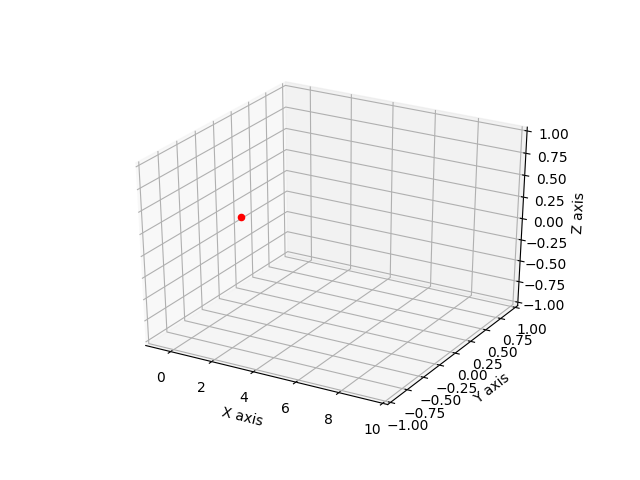

shape = 3
simulating grid
compleat, percent compleat = 100.0%                    
grid simulated
time == 0 R == 1 E field PASS
time == 0 R == 1 H field PASS
time == 1 R == 1 E filed PASS
time == 1 R == 2 E field Pass
time == 1 R == 1 H field PASS


In [6]:
test_charge_1()

In [7]:
def test_current_1():
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[10,1,1],  # this is the size of the grid in meters
                time=3 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    mapping.Add_Current([0, 0, 0],
                    direction=[0, 0, 1],
                    Amps=1)
                    #Amps=1/(np.linalg.norm(mapping.delta)))

    jefimenko.plot_grid(mapping)

    U_0 = jefimenko.U_0

    for i in range(len(mapping.currents[0])):
        print('amps = ' + str(mapping.currents[0][i].amps))
        print('direction = ' + str(mapping.currents[0][i].direction))
        print('location = '+ str(mapping.currents[0][i].location))
        print('')
    jefimenko.simulate(mapping)


    print(' The H field is ')
    for t in range(int(mapping.time/mapping.delta_t)):
        # jefimenko.plot_grid(mapping, time = t)
        jefimenko.plot_EM_grid('H', mapping, time=t)
 
    print(' The E field is ')
    for t in range(int(mapping.time/mapping.delta_t)):
        # jefimenko.plot_grid(mapping, time = t)
        jefimenko.plot_EM_grid('E', mapping, time=t)
    
    
    if(mapping.grid['H'][0][1][0][0] == [0, 0, 0]).all():
        print("time == 0 PASS")
    else:
        print("time == 0 Fail")
    test_array = [0, 2*10**-7, 0]

    percent = abs((np.linalg.norm(U_0 * mapping.grid['H'][1][1][0][0] - test_array) / (2*10**-7)) * 100)

    if percent <= 1:
        print("time == 1 R == 1 PASS")
    else:
        print("H field is within " + str( percent) + " percent at time = 1")
        print("time = 1 FAIL")
        print('H_field is ')
        print(mapping.grid['H'][1][1][0][0])
        print('target is')
        print(test_array)
        print('')

    test_array = [0, 1*10**-7, 0]
    percent = abs((np.linalg.norm(U_0 * mapping.grid['H'][2][2][0][0] - test_array) / (1*10**-7)) * 100)

    if percent <= 1:
        print("time == 2 R == 2 PASS")
    else:
        print("H field is within " + str( percent) + " percent at time = 2 R == 2")
        print("time = 2 FAIL")
        print('H_field is ')
        print(U_0 * mapping.grid['H'][2][2][0][0])   
        print('target is')
        print(test_array)
        print('')

delta paded


<IPython.core.display.Javascript object>


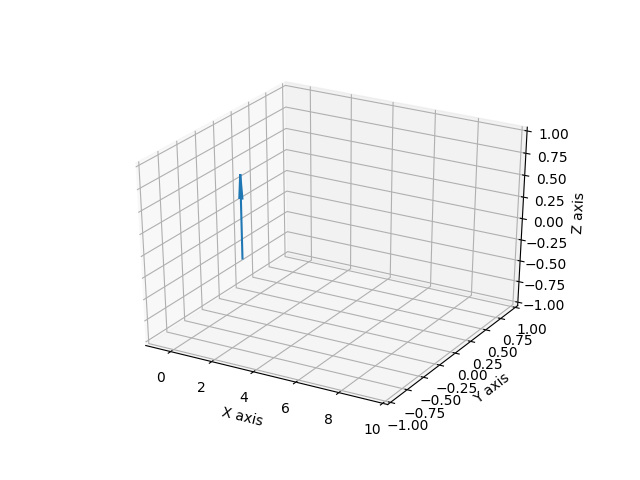

shape = 3
amps = 1.0
direction = [0. 0. 1.]
location = [0. 0. 0.]

simulating grid
compleat, percent compleat = 100.0%                    
grid simulated
 The H field is 


<IPython.core.display.Javascript object>


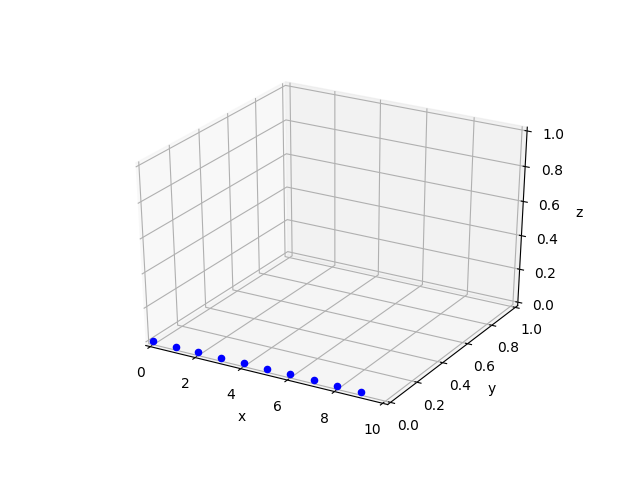

The acutal time is 0.0


<IPython.core.display.Javascript object>


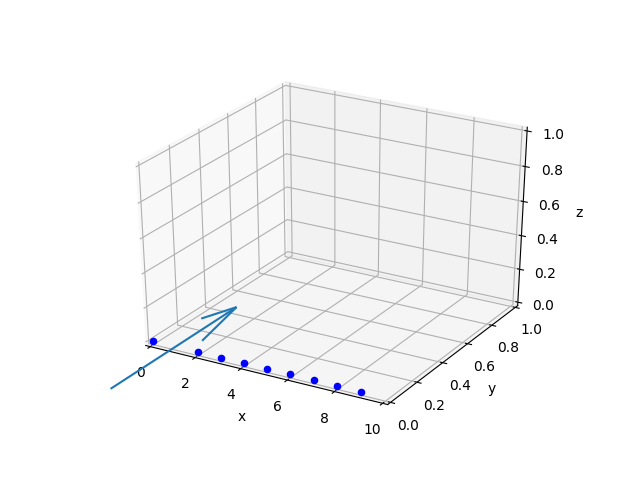

The acutal time is 3.36e-09


<IPython.core.display.Javascript object>


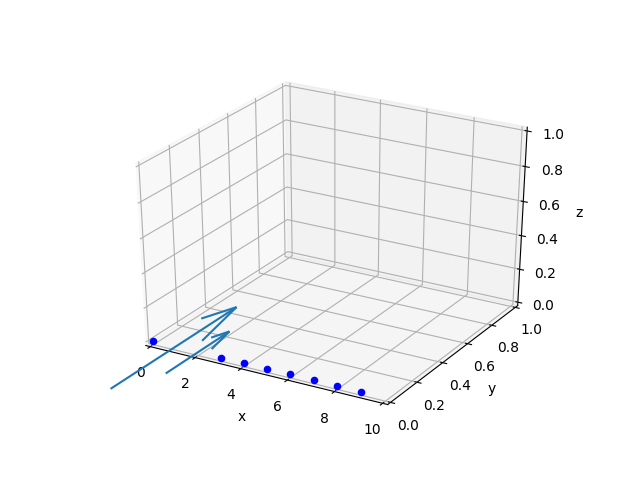

The acutal time is 6.72e-09
 The E field is 


<IPython.core.display.Javascript object>


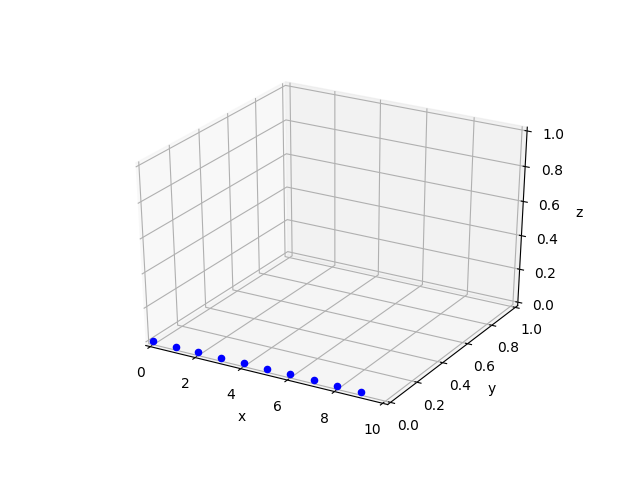

The acutal time is 0.0


<IPython.core.display.Javascript object>


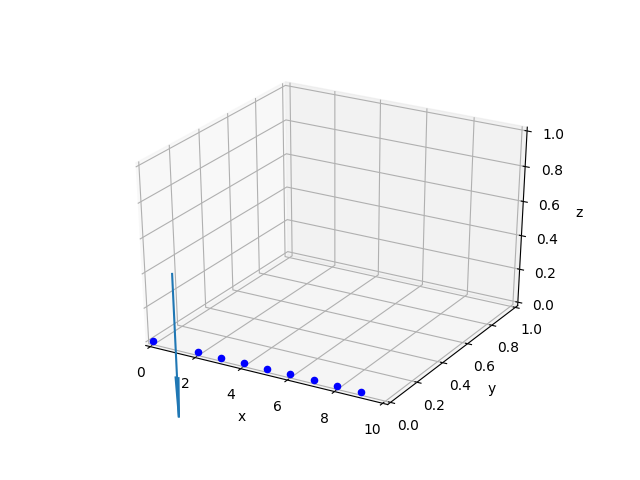

The acutal time is 3.36e-09


<IPython.core.display.Javascript object>


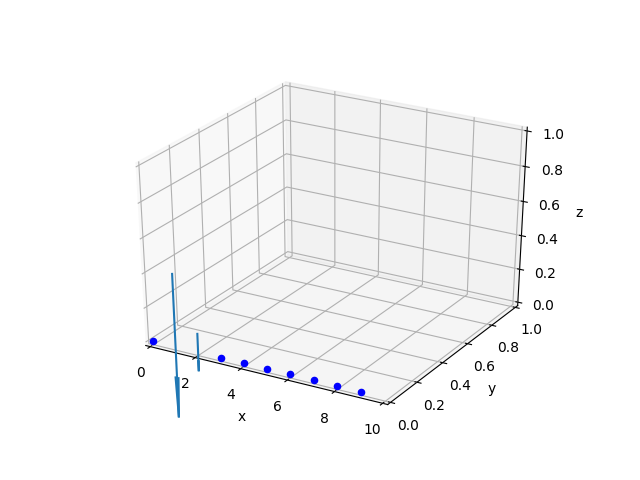

The acutal time is 6.72e-09
time == 0 PASS
time == 1 R == 1 PASS
time == 2 R == 2 PASS


In [8]:
test_current_1()

In [9]:
def test_current_2():
    # time = 99
    time = 50
    #r = 10
    r = 50

    mapping = jefimenko.Grid(delta=[1, 1, 1],  # this is the size of a step in x, y and z
                size=[r + 1, 1, 1],  # this is the size of the grid in meters
                time=(time + 1) * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    delta_t = 3.36 * 10**-9
    mapping.Add_Current([0],
                    direction=[0, 1, 0],
                    Amps=1/(np.linalg.norm(mapping.delta)))

    #jefimenko.plot_grid(mapping)

    w = 2 * np.pi

    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
    
    pass_count = 0
    fail_count = 0
    pass_count_E = 0
    fail_count_E = 0
    
    scale = np.linalg.norm([1]) / (4 * np.pi)
    
    I_0 = 1
    for t in range(time + 1):
        mapping.Modify_Current(0, time=t * delta_t, amps=I_0 * np.sin(t * delta_t * w))

    #for t in range(len(mapping.currents)):
    #    for i in range(len(mapping.currents[t])):
    #        print('amps = ' + str(mapping.currents[t][i].amps))
    #        print('direction = ' + str(mapping.currents[t][i].direction))
    #        print('location = '+ str(mapping.currents[t][i].location))
    #        print('')

    jefimenko.simulate(mapping)

    #for t in range(mapping.time_size):
    #    jefimenko.plot_EM_grid('H', mapping, time=t)

    #for t in range(mapping.time_size):
    ##for t in range(10):
    #    jefimenko.plot_EM_grid('H', mapping, time=t)

    jefimenko.plot_EM_grid('H', mapping, time=time-1)

    
    for test_time in range(time + 1):
        for test_r in range(1, test_time):

            test_array_E_1 = [0,- I_0 * w * np.cos(w * (test_time - test_r / C_0)) / (4 * np.pi * E_0 * test_r * C_0**2), 0 ]
            test_array_E_2 = [0, -I_0 * np.sin(w * (test_time * delta_t - test_r / C_0)) / (test_r**2 * E_0 * 2 * np.pi * C_0), 0]
            
            test_array_E = [test_array_E_1[0] + test_array_E_2[0], test_array_E_1[1] + test_array_E_2[1], test_array_E_1[2] + test_array_E_2[2]]

            test_array_H_1 = [0, 0, - 1 * I_0 * w * np.cos(w * (test_time * delta_t - test_r / C_0)) / (4 * np.pi * test_r * C_0)]
            test_array_H_2 = [0, 0, - scale * I_0 * np.sin(w * (test_time * delta_t - test_r / C_0)) * 2 / test_r ]

            test_array_H = [test_array_H_1[0] + test_array_H_2[0], test_array_H_1[1] + test_array_H_2[1], test_array_H_1[2] + test_array_H_2[2]]

            percent_E = abs((np.linalg.norm(mapping.grid['E'][test_time][test_r][0][0] - test_array_E) / np.linalg.norm(test_array_E)) * 100)
            percent_H = abs((np.linalg.norm(mapping.grid['H'][test_time][test_r][0][0] - test_array_H) / np.linalg.norm(test_array_H)) * 100)

            if percent_E <= 5:
                pass_count_E  = pass_count_E + 1

            else:
                fail_count_E = fail_count_E + 1

            if percent_H <= 5:
                pass_count  = pass_count + 1

            else:
                fail_count = fail_count + 1
                print('H_field')
                print(str(mapping.grid['H'][test_time][test_r][0][0]))
                print('target H_field')
                print(str(test_array_H))
                print('')

    print('E field pass count = ' + str(pass_count_E))
    print('E field fail count = ' + str(fail_count_E))
    if fail_count_E < 120:
        print('this is curently exseptable')
    print() 
    print('H field pass count = ' + str(pass_count))
    print('H field fail count = ' + str(fail_count))
    if fail_count < 120:
        print('this is curently exseptable')
    

delta paded
simulating grid
compleat, percent compleat = 100.0%                    
grid simulated


<IPython.core.display.Javascript object>


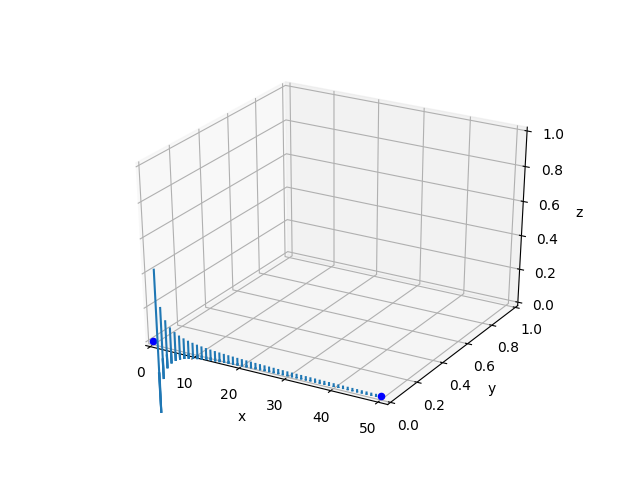

The acutal time is 1.6464e-07
H_field
[ 0.00000000e+00+0.j  0.00000000e+00+0.j -4.57074589e-10+0.j]
target H_field
[0, 0, -4.81433636744912e-10]

H_field
[ 0.0000000e+00+0.j  0.0000000e+00+0.j -4.1898504e-10+0.j]
target H_field
[0, 0, -4.433440876843762e-10]

H_field
[ 0.00000000e+00+0.j  0.00000000e+00+0.j -3.86755421e-10+0.j]
target H_field
[0, 0, -4.1111446924853815e-10]

H_field
[ 0.00000000e+00+0.j  0.00000000e+00+0.j -3.59130034e-10+0.j]
target H_field
[0, 0, -3.8348908201781945e-10]

H_field
[ 0.00000000e+00+0.j  0.00000000e+00+0.j -3.35188032e-10+0.j]
target H_field
[0, 0, -3.59547079751197e-10]

H_field
[ 0.0000000e+00+0.j  0.0000000e+00+0.j -3.1423878e-10+0.j]
target H_field
[0, 0, -3.3859782776790187e-10]

H_field
[ 0.00000000e+00+0.j  0.00000000e+00+0.j -2.95754146e-10+0.j]
target H_field
[0, 0, -3.201131936649945e-10]

H_field
[ 0.0000000e+00+0.j  0.0000000e+00+0.j -2.7932336e-10+0.j]
target H_field
[0, 0, -3.0368240779574385e-10]

H_field
[ 0.0000000e+00+0.j  0.0000000e+0

H_field
[ 0.00000000e+00+0.j  0.00000000e+00+0.j -2.93695512e-10+0.j]
target H_field
[0, 0, -3.180545599182484e-10]

H_field
[ 0.00000000e+00+0.j  0.00000000e+00+0.j -2.04580987e-10+0.j]
target H_field
[0, 0, -2.2894003523776664e-10]

H_field
[ 0.00000000e+00+0.j  0.00000000e+00+0.j -1.19710011e-10+0.j]
target H_field
[0, 0, -1.4406905935159287e-10]

H_field
[ 0.00000000e+00+0.j  0.00000000e+00+0.j -3.77695512e-10+0.j]
target H_field
[0, 0, -4.02054559918248e-10]

H_field
[ 0.00000000e+00+0.j  0.00000000e+00+0.j -2.86532207e-10+0.j]
target H_field
[0, 0, -3.1089125474996156e-10]

H_field
[ 0.00000000e+00+0.j  0.00000000e+00+0.j -1.99710011e-10+0.j]
target H_field
[0, 0, -2.2406905935159275e-10]

H_field
[ 0.00000000e+00+0.j  0.00000000e+00+0.j -1.16926058e-10+0.j]
target H_field
[0, 0, -1.4128510559966024e-10]

H_field
[ 0.00000000e+00+0.j  0.00000000e+00+0.j -4.61695512e-10+0.j]
target H_field
[0, 0, -4.860545599182474e-10]

H_field
[ 0.00000000e+00+0.j  0.00000000e+00+0.j -3.68483426

In [10]:
test_current_2()


In [11]:
def test_current_3():
    time = 50
    r = 50

    mapping = jefimenko.Grid(delta=[1],  # this is the size of a step in x, y and z
                size=[r + 1],  # this is the size of the grid in meters
                time=(time + 1) * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    delta_t = 3.36 * 10**-9
    mapping.Add_Current([0 ,0 ,0],
                    direction=[0, 0, 1],
                    Amps=1/(np.linalg.norm(mapping.delta)))

    for i in range(len(mapping.currents[0])):
        print('amps = ' + str(mapping.currents[0][i].amps))
        print('direction = ' + str(mapping.currents[0][i].direction))
        print('location = '+ str(mapping.currents[0][i].location))
        print('')

    w = 2 * np.pi

    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
    
    pass_count = 0
    fail_count = 0
    pass_count_E = 0
    fail_count_E = 0
    
    scale = np.linalg.norm([1]) / (4 * np.pi)
    
    I_0 = 1
    for t in range(time + 1):
        mapping.Modify_Current(0, time=t * delta_t, amps=I_0 * np.sin(t * delta_t * w), print_all=True)

    jefimenko.simulate(mapping)

    jefimenko.plot_EM_grid('E', mapping, time=27)

    for test_time in range(time + 1):
        for test_r in range(1, test_time):

            test_array_E_1 = [0, 0,- I_0 * w * np.cos(w * (test_time - test_r / C_0)) / (4 * np.pi * E_0 * test_r * C_0**2)]
            test_array_E_2 = [0, 0, -I_0 * np.sin(w * (test_time * delta_t - test_r / C_0)) / (test_r**2 * E_0 * 2 * np.pi * C_0)]

            test_array_E = [test_array_E_1[0] + test_array_E_2[0], test_array_E_1[1] + test_array_E_2[1], test_array_E_1[2] + test_array_E_2[2]]

            test_array_H_1 = [0, 1 * I_0 * w * np.cos(w * (test_time * delta_t - test_r / C_0)) / (4 * np.pi * test_r * C_0), 0]
            test_array_H_2 = [0, scale * I_0 * np.sin(w * (test_time * delta_t - test_r / C_0)) * 2 / test_r, 0]

            test_array_H = [test_array_H_1[0] + test_array_H_2[0], test_array_H_1[1] + test_array_H_2[1], test_array_H_1[2] + test_array_H_2[2]]

            percent_E = abs((np.linalg.norm(mapping.grid['E'][test_time][test_r] - test_array_E) / np.linalg.norm(test_array_E)) * 100)

            percent_H = abs((np.linalg.norm(mapping.grid['H'][test_time][test_r] - test_array_H) / np.linalg.norm(test_array_H)) * 100)

            if percent_E <= 5:
                pass_count_E  = pass_count_E + 1

            else:
                fail_count_E = fail_count_E + 1
                print('test percent at time t = ' + str(t))
                print(percent_E)
                print('test_array = ' + str(test_array_E))
                # print(' true time = ' + str(t) + ' retarded time = ' + str(t_0))
                # print(mapping.grid['E'][t_0][5, 5])
                print()


            if percent_H <= 5:
                pass_count  = pass_count + 1
            else:
                fail_count = fail_count + 1
                print('test percent at time t = ' + str(t))
                print(percent_H)
                print('test_array = ' + str(test_array_H))
                print(' true time = ' + str(t) + ' retarded time = ' + str(test_time))
                print('H field is = ' + str(mapping.grid['H'][test_time][test_r]))
                print()

    print('E field pass count = ' + str(pass_count_E))
    print('E fiels fail count = ' + str(fail_count_E))
    if fail_count_E < 120:
        print('this is curently exseptable')

    print()

    print('H field pass count = ' + str(pass_count))
    print('H field fail count = ' + str(fail_count))
    if fail_count < 120:
        print('this is curently exseptable')
    else:
        print('there is room for improvment')

In [12]:
test_current_3()

delta paded
 grid size is [51, 1.0, 1.0]
recommended to give all three measurements
amps = 0.5773502691896258
direction = [0. 0. 1.]
location = [0. 0. 0.]

Modifying Current
New Time = 0
New Amps = 0.0
New direction = False
poresent direction = [0. 0. 1.]

Modifying Current
New Time = 1
New Amps = 2.111150263212341e-08
New direction = False
poresent direction = [0. 0. 1.]

Modifying Current
New Time = 2
New Amps = 4.222300526424681e-08
New direction = False
poresent direction = [0. 0. 1.]

Modifying Current
New Time = 3
New Amps = 6.333450789637018e-08
New direction = False
poresent direction = [0. 0. 1.]

Modifying Current
New Time = 4
New Amps = 8.444601052849354e-08
New direction = False
poresent direction = [0. 0. 1.]

Modifying Current
New Time = 5
New Amps = 1.0555751316061684e-07
New direction = False
poresent direction = [0. 0. 1.]

Modifying Current
New Time = 6
New Amps = 1.266690157927401e-07
New direction = False
poresent direction = [0. 0. 1.]

Modifying Current
New Time =

<IPython.core.display.Javascript object>

The acutal time is 9.072e-08
test percent at time t = 50
5.059689676686613
test_array = [0, 4.81433636744912e-10, 0]
 true time = 50 retarded time = 12
H field is = [[[0.00000000e+00+0.j 4.57074589e-10+0.j 0.00000000e+00+0.j]]]

test percent at time t = 50
5.494388826906168
test_array = [0, 4.433440876843762e-10, 0]
 true time = 50 retarded time = 13
H field is = [[[0.0000000e+00+0.j 4.1898504e-10+0.j 0.0000000e+00+0.j]]]

test percent at time t = 50
5.925125443287051
test_array = [0, 4.1111446924853815e-10, 0]
 true time = 50 retarded time = 14
H field is = [[[0.00000000e+00+0.j 3.86755421e-10+0.j 0.00000000e+00+0.j]]]

test percent at time t = 50
6.351953461180301
test_array = [0, 3.8348908201781945e-10, 0]
 true time = 50 retarded time = 15
H field is = [[[0.00000000e+00+0.j 3.59130034e-10+0.j 0.00000000e+00+0.j]]]

test percent at time t = 50
6.774925841515908
test_array = [0, 3.59547079751197e-10, 0]
 true time = 50 retarded time = 16
H field is = [[[0.00000000e+00+0.j 3.35188032e

test percent at time t = 50
5.486015964456316
test_array = [0, 4.4402072790711086e-10, 0]
 true time = 50 retarded time = 40
H field is = [[[0.0000000e+00+0.j 4.1966168e-10+0.j 0.0000000e+00+0.j]]]

test percent at time t = 50
7.125284821969152
test_array = [0, 3.418677095317424e-10, 0]
 true time = 50 retarded time = 40
H field is = [[[0.00000000e+00+0.j 3.17508662e-10+0.j 0.00000000e+00+0.j]]]

test percent at time t = 50
9.938770309489843
test_array = [0, 2.450911658077096e-10, 0]
 true time = 50 retarded time = 40
H field is = [[[0.00000000e+00+0.j 2.20732118e-10+0.j 0.00000000e+00+0.j]]]

test percent at time t = 50
15.892120213379249
test_array = [0, 1.5327752176183166e-10, 0]
 true time = 50 retarded time = 40
H field is = [[[0.00000000e+00+0.j 1.28918474e-10+0.j 0.00000000e+00+0.j]]]

test percent at time t = 50
5.629826042483998
test_array = [0, 4.326785203425535e-10, 0]
 true time = 50 retarded time = 41
H field is = [[[0.00000000e+00+0.j 4.08319472e-10+0.j 0.00000000e+00+0.j

In [13]:
def test_current_4():
    time = 50
    r = 50 * .1

    mapping = jefimenko.Grid(1,   # creat a 1D grid
                delta=[.1],  # this is the size of a step in x, y and z
                size=[r + 1],  # this is the size of the grid in meters
                time=(time + 1) * 3.36 * 10**-9 * 10**-1,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9 * 10**-1  # this is the size of a full time step
        )
    delta_t = 3.36 * 10**-9 * 10**-1
    mapping.Add_Current([0],
                    direction=[0, 0, 1],
                    Amps=1/(np.linalg.norm(mapping.delta)))

    for i in range(len(mapping.currents[0])):
        print('amps = ' + str(mapping.currents[0][i].amps))
        print('direction = ' + str(mapping.currents[0][i].direction))
        print('location = '+ str(mapping.currents[0][i].location))
        print('')

    w = 2 * np.pi

    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
    
    pass_count = 0
    fail_count = 0
    pass_count_E = 0
    fail_count_E = 0
    
    scale = np.linalg.norm([1]) / (4 * np.pi)
    
    I_0 = 1
    for t in range(time):# + 1):
        mapping.Modify_Current(0, time=t * delta_t, amps=I_0 * np.sin(t * delta_t * w), print_all=True)

    jefimenko.simulate(mapping)
    
   # mapping = jefimenko.Grid(3,   # creat a 1D grid
   #             delta=[1, 1, 1],  # this is the size of a step in x, y and z
   #             size=[10, 1, 1],  # this is the size of the grid in meters
   #             time=10 * 3.36 * 10**-9 * 10**-1 ,  # this is the length of a simulation in secounds
   #             delta_t=3.36 * 10**-9 * 10**-1  # this is the size of a full time step
   #     )
   # mapping.Add_Current([0, 0, 0],
   #                 direction=[0, 0, 1],
   #                 #Amps = 5)
   #                 Amps=5/(np.linalg.norm(mapping.delta)))
#
   # jefimenko.plot_grid(mapping)
#
   # U_0 = jefimenko.U_0
#
   # for i in range(len(mapping.currents[0])):
   #     print('amps = ' + str(mapping.currents[0][i].amps))
   #     print('direction = ' + str(mapping.currents[0][i].direction))
   #     print('location = '+ str(mapping.currents[0][i].location))
   #     print('')
   # jefimenko.simulate(mapping)

    return(mapping)

In [14]:
# mapping = test_current_4()
# print_specs(mapping)

notes on test_charge_3
# notice that the t = 8, 27 error seems to be do to a double addition of the field do to the charge 
# on the other hand t =74, 93 seem to be do to a cumpleat miss of of the field at those times
this will need to be fixed although it is not obiveus how

In [15]:
def test_charge_3():
    time_steps = 100
    # time_steps = 200
    delta = [1, 1, 1]
    delta_t=3.36 * 10**-9
    mapping = jefimenko.Grid(delta=delta,  # this is the size of a step in x, y and z in meters
                size=[10, 10, 1],  # this is the size of the grid in meters
                time=time_steps * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=delta_t  # this is the size of a full time step
        )
    
    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
 
    
    q = 1
    mapping.Add_Charge([0, 0, 0], Q = q)

    # v = .1
    v = 10 / time_steps
    w = 2 * np.pi / time_steps
    for t in range(time_steps):
        mapping.modify_charge(0, t, location=[t * v, 0])#, print_charge=True) 

    jefimenko.plot_grid(mapping, time=0)
    jefimenko.plot_grid(mapping, time=time_steps - 1)
    
    jefimenko.simulate(mapping)
    
    jefimenko.plot_EM_grid('H', mapping, time=2)
    jefimenko.plot_EM_grid('H', mapping, time=27)


    print(mapping.grid['E'][time_steps - 1][5, 5, 0])

    test_E_pass_count = 0
    test_E_fail_count = 0
    test_fail_location_E = []
    test_fail_location_H = []
    test_H_pass_count = 0
    test_H_fail_count = 0

    for t in range(time_steps - 6):
        x = 5
        y = 5
        x = 5 - t * v
        R_0 = np.array([x, y, 0])
        r = np.linalg.norm(R_0)
        t_0 = int(t + (r / C_0)/delta_t)
        
        theta = np.arctan2(y, x)

        E_scale = q * (1 - v**2 / C_0**2) / (4 * np.pi * E_0 * r**3 * (1 - (v**2 / C_0**2) * np.sin(theta)**2 )**(3/2)) 
        test_array_E =  E_scale * R_0
        test_array_H = ((E_0) * np.cross(np.array([v, 0, 0]), test_array_E))

        percent_E = abs((np.linalg.norm(mapping.grid['E'][t_0][5, 5, 0] - test_array_E ) / np.linalg.norm(test_array_E)) * 100)
        percent_H = abs((np.linalg.norm(mapping.grid['H'][t_0][5, 5, 0] - test_array_H ) / np.linalg.norm(test_array_H)) * 100)

        if percent_E < 5:
            test_E_pass_count +=1
        else:
            test_E_fail_count += 1
            test_fail_location_E.append(t)
        if percent_E > 5:
            print('test percent at time t = ' + str(t))
            print('test array E = ' + str(test_array_E))
            print('simulated E field = ' + str(mapping.grid['E'][t_0][5, 5, 0]))
            print('percent_E = ' + str(percent_E))
            if percent_E > 90:
                print('this one needs fixed')
            print()

        if percent_H < 5:  # note H test_array directly calculated from E test array
            test_H_pass_count +=1
        else:
            test_H_fail_count += 1
            test_fail_location_H.append(t)
            print('test percent at time t = ' + str(t))
            print('test array H = ' + str(test_array_H))
            print('simulated H field = ' + str(mapping.grid['H'][t_0][5, 5, 0]))
            print('percent_H = ' + str(percent_H))
            print()

    print('E field specs')
    print('test pass count = ' + str(test_E_pass_count))
    print('test fail count = ' + str(test_E_fail_count))
    print('points of failure')
    print(test_fail_location_E)
    print()
    print('H field specs')
    print('test pass count = ' + str(test_H_pass_count))
    print('test fail count = ' + str(test_H_fail_count))
    print('points of failure')
    print(test_fail_location_H)

    if test_H_fail_count == 0:
        print('NOTHING NEEDS FIXED')

In [16]:
test_charge_3()

delta paded


<IPython.core.display.Javascript object>

shape = 3


<IPython.core.display.Javascript object>

shape = 3
simulating grid
compleat, percent compleat = 100.0%                    
grid simulated


<IPython.core.display.Javascript object>

The acutal time is 6.72e-09


<IPython.core.display.Javascript object>

The acutal time is 9.072e-08
[0.+0.j 0.+0.j 0.+0.j]
test percent at time t = 8
test array E = [1.35570408e+08 1.61393343e+08 0.00000000e+00]
simulated E field = [2.70319470e+08+0.j 3.18078298e+08+0.j 0.00000000e+00+0.j]
percent_E = 98.0455277927779
this one needs fixed

test percent at time t = 8
test array H = [0.        0.        0.0001429]
simulated H field = [0.        +0.j 0.        +0.j 0.00028163+0.j]
percent_H = 97.08266355421489

test percent at time t = 27
test array E = [1.23999614e+08 2.69564377e+08 0.00000000e+00]
simulated E field = [2.50436313e+08+0.j 5.32974168e+08+0.j 0.00000000e+00+0.j]
percent_E = 98.47204166829087
this one needs fixed

test percent at time t = 27
test array H = [0.         0.         0.00023868]
simulated H field = [0.        +0.j 0.        +0.j 0.00047191+0.j]
percent_H = 97.71683989008643

test percent at time t = 74
test array E = [-1.26436700e+08  2.63409791e+08  0.00000000e+00]
simulated E field = [0.+0.j 0.+0.j 0.+0.j]
percent_E = 100.0
this o

In [17]:
#pdb.pm()

In [18]:
def test_charge_4():
    time_steps = 150
    delta = [1, 1, 1]
    delta_t = 3.36 * 10**-9
    
    mapping = jefimenko.Grid(delta=delta,  # this is the size of a step in x, y and z in meters
                size=[10, 10, 1],  # this is the size of the grid in meters
                time=time_steps * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    
    C_0 = jefimenko.C_0
    U_0 = jefimenko.U_0
    E_0 = jefimenko.E_0
    
    q = 1
    mapping.Add_Charge([0, 0, 0], Q = q)

    r = 2
    w = 2 * np.pi / time_steps
    for t in range(time_steps):
        location = r * np.array([np.cos( w * t), np.sin( w * t)]) + np.array([5, 5])
        mapping.modify_charge(0, t, location=location) 

    jefimenko.plot_grid(mapping, time=0)
    jefimenko.plot_grid(mapping, time=int(time_steps/5))
    jefimenko.plot_grid(mapping, time=int(2*time_steps/5))
    jefimenko.plot_grid(mapping, time=int(3*time_steps/5))
    jefimenko.plot_grid(mapping, time=int(4*time_steps/5))

    test_E_pass_count = 0
    test_E_fail_count = 0
    test_fail_location = []
    test_H_pass_count = 0
    test_H_fail_count = 0

    jefimenko.simulate(mapping)

    for t in range (0, time_steps, int(time_steps / 5)):
        jefimenko.plot_EM_grid('H', mapping, time=t)
    

    print(mapping.grid['E'][time_steps - 1][5, 5])

    for t in range(time_steps - 2):
        
        t_0 = int(np.rint(t + (r / C_0)/delta_t))
        R_0 = - r * np.array([np.cos(w * t), np.sin(w * t), 0])
        v = w * r
        V_0 = v**2 / r**2 * r * np.array([- np.sin(w * t), np.cos(w * t), 0]) 
    
        test_array_E = (q / (4 * np.pi * E_0 * r**3) * (((1 - v**2 / C_0**2) *
                                                   np.cos(v/C_0) +
                                                   (v / C_0) * np.sin(v / C_0)) * R_0 +
                                                   ((1 - v **2 / C_0**2) * (r / v) *
                                                    np.sin(v / C_0) - r / C_0 *
                                                    np.cos(v / C_0)) * V_0))

        test_array_H = (q / (4 * np.pi * r**3) * v * r * np.array([0, 0, 1]))

        percent_E = abs((np.linalg.norm(mapping.grid['E'][t_0][5, 5] - test_array_E ) / np.linalg.norm(test_array_E)) * 100)
        percent_H = abs((np.linalg.norm(mapping.grid['H'][t_0][5, 5] - test_array_H ) / np.linalg.norm(test_array_H)) * 100)

        if percent_E < 5:
            test_E_pass_count +=1
        else:
            test_E_fail_count += 1
            test_fail_location.append(t)
        if percent_E > 5:
            print('test percent at time t = ' + str(t))
            print('test array E      = ' + str(test_array_E))
            print('simulated E field = ' + str(mapping.grid['E'][t_0][5, 5]))
            print('percent_E = ' + str(percent_E))
            if percent_E > 90:
                print('this one needs fixed')
            print()

        if percent_H < 5:
            test_H_pass_count +=1
        else:
            test_H_fail_count += 1
            test_fail_location.append(t)
            print('note test array directly calculated from E test array')
            print('test percent at time t = ' + str(t))
            print('test array H = ' + str(test_array_H))
            print('simulated H field = ' + str(mapping.grid['H'][t_0][5, 5]))
            print('percent_H = ' + str(percent_H))
            print()

    print('E field specs')
    print('test pass count = ' + str(test_E_pass_count))
    print('test fail count = ' + str(test_E_fail_count))
    print('points of failer')
    print(test_fail_location)
    print()
    print('H field specs')
    print('test pass count = ' + str(test_H_pass_count))
    print('test fail count = ' + str(test_H_fail_count))
    print('points of failer')
    print(test_fail_location)

    if test_H_fail_count == 0:
        print('NOTHING NEEDS FIXED')

In [19]:
test_charge_4()

delta paded


<IPython.core.display.Javascript object>

shape = 3


<IPython.core.display.Javascript object>

shape = 3


<IPython.core.display.Javascript object>

shape = 3


<IPython.core.display.Javascript object>

shape = 3


<IPython.core.display.Javascript object>

shape = 3
simulating grid
compleat, percent compleat = 100.0%                    
grid simulated


<IPython.core.display.Javascript object>

The acutal time is 0.0


/home/nehemiah/anaconda3/envs/jefimenko/lib/python3.7/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

The acutal time is 1.008e-07


<IPython.core.display.Javascript object>

The acutal time is 2.016e-07


<IPython.core.display.Javascript object>

The acutal time is 3.024e-07


<IPython.core.display.Javascript object>

The acutal time is 4.032e-07
[[-2.22917056e+09+0.j  2.81609731e+08+0.j  0.00000000e+00+0.j]]
E field specs
test pass count = 148
test fail count = 0
points of failer
[]

H field specs
test pass count = 148
test fail count = 0
points of failer
[]
NOTHING NEEDS FIXED


In [20]:
def test_current_5():
    delta = .1
    mapping = jefimenko.Grid(delta=[1 * delta, 1 * delta, 1 * delta],  # this is the size of a step in x, y and z
                size=[11 * delta, 2 * delta, 2 * delta],  # this is the size of the grid in meters
                time=11 * 3.36 * 10**-9  * delta,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9 * delta  # this is the size of a full time step
        )
    mapping.Add_Current([0, 0, 0],
                    direction=[0, 0, 1],
                    Amps=1)

    jefimenko.plot_grid(mapping)

    U_0 = jefimenko.U_0

    for i in range(len(mapping.currents[0])):
        print('amps = ' + str(mapping.currents[0][i].amps))
        print('direction = ' + str(mapping.currents[0][i].direction))
        print('location = '+ str(mapping.currents[0][i].location))
        print('')
    jefimenko.simulate(mapping)


    #print(' The H field is ')
    #for t in range(int(mapping.time/mapping.delta_t)):
        # jefimenko.plot_grid(mapping, time = t)
    #    jefimenko.plot_EM_grid('H', mapping, time=t)
 
    #print(' The E field is ')
    #for t in range(int(mapping.time/mapping.delta_t)):
        # jefimenko.plot_grid(mapping, time = t)
    #    jefimenko.plot_EM_grid('E', mapping, time=t)
    
    
    if(mapping.grid['H'][0][1][0][0] == [0, 0, 0]).all():
        print("time == 0 PASS")
    else:
        print("time == 0 Fail")
    test_array = [0, 2*10**-7, 0]

    percent = abs((np.linalg.norm(U_0 * mapping.grid['H'][-1][10][0][0] - test_array) /
                   (np.linalg.norm(test_array))) * 100)

    if percent <= 1:
        print("time == 1 R == 1 PASS")
    else:
        print("H field is within " + str( percent) + " percent at time = 1")
        print("time = 1 FAIL")
        print('H_field is ')
        print(mapping.grid['H'][-1][10][0][0])
        print('target is')
        print(test_array)
        print('')

    test_array = [0, 2*10**-6, 0]
    percent = abs((np.linalg.norm(U_0 * mapping.grid['H'][-1][1][0][0] - test_array) /
                   (np.linalg.norm(test_array))) * 100)

    if percent <= 1:
        print("time == 2 R == 2 PASS")
    else:
        print("H field is within " + str( percent) + " percent at time = 2 R == 2")
        print("time = 2 FAIL")
        print('H_field is ')
        print(U_0 * mapping.grid['H'][-1][10][0][0])   
        print('target is')
        print(test_array)
        print('')

In [21]:
test_current_5()

delta paded


<IPython.core.display.Javascript object>

shape = 3
amps = 1.0
direction = [0. 0. 1.]
location = [0. 0. 0.]

simulating grid
compleat, percent compleat = 100.0%                    
grid simulated
time == 0 PASS
time == 1 R == 1 PASS
time == 2 R == 2 PASS
